# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

> As a used car dealership, it is important to us to understand what an appropriate market price is for the cars we sell. This dataset contains a large number of used cars with various details about them and how much they sold for. Using this large dataset, we can construct a theoretical model of how much each of these different details contributes to the market value of a car. This model can then, hopefully, be used to predict with decent precision the expected value of other cars that are not in the dataset and have not been sold yet. In doing so, the prices we set can be as attuned as possible to the details of the market, maximizing business profits.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import numpy as np

In [2]:
vehicles = pd.read_csv('data/vehicles.csv')

In [3]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

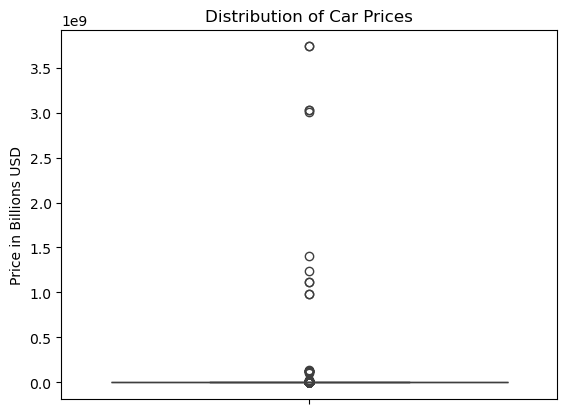

In [16]:
price_boxplot = sns.boxplot(vehicles['price'])
price_boxplot.set(title='Distribution of Car Prices', ylabel='Price in Billions USD')
plt.show()

In [19]:
price_boxplot.get_figure().savefig('images/car_prices_boxplot.png')

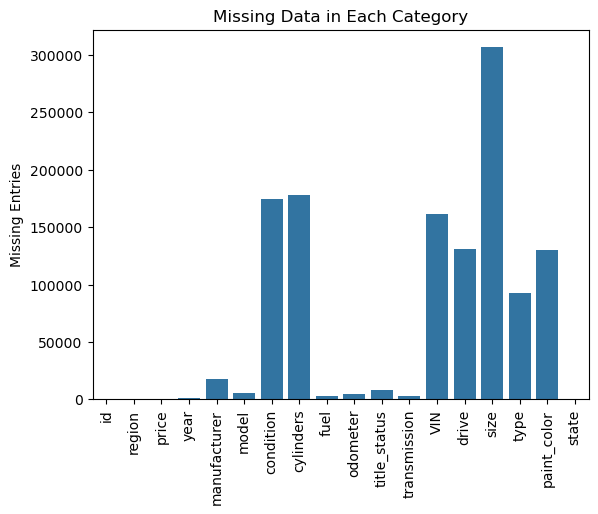

In [28]:
missing_count = len(vehicles) - vehicles.count()
missing_data_barplot = sns.barplot(missing_count)
missing_data_barplot.set(title='Missing Data in Each Category', ylabel='Missing Entries')
plt.xticks(rotation=90)
plt.show()

In [30]:
missing_data_barplot.get_figure().savefig('images/missing_data_barplot.png', bbox_inches='tight')

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [32]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [33]:
vehicles_cleaned = vehicles.dropna(subset=['year', 'odometer']).fillna('unknown')

In [34]:
vehicles_cleaned2 = vehicles_cleaned.drop(vehicles_cleaned.query('price >= 400_000 or odometer > 500_000').index)

In [35]:
unknown_manu = vehicles_cleaned2.query('manufacturer == "unknown"')
individual_terms_in_model = pd.Series([item.lower() for sublist in unknown_manu['model'].str.split(' ').to_list() for item in sublist]).value_counts()

In [36]:
individual_terms_in_model.head(20)

scion            1894
4d               1159
hatchback        1007
international     968
freightliner      827
genesis           718
isuzu             653
im                644
sedan             622
hummer            522
g70               437
all               409
oldsmobile        409
npr               391
maserati          375
suzuki            329
saab              328
4300              306
tc                301
xb                293
Name: count, dtype: int64

In [38]:
top_10_words_in_model_category = individual_terms_in_model.head(10)

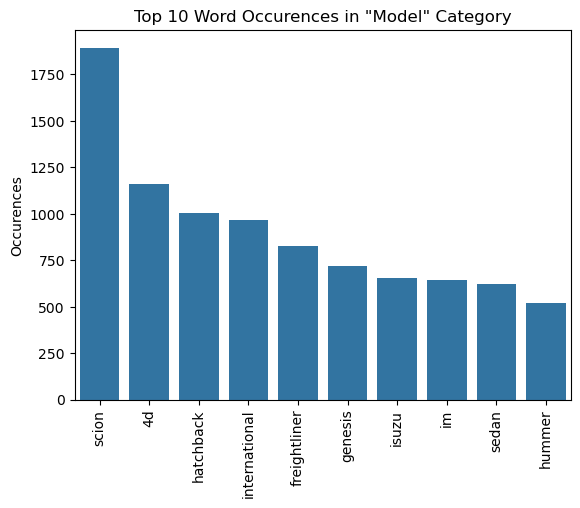

In [40]:
model_top_words_barplot = sns.barplot(top_10_words_in_model_category)
model_top_words_barplot.set(title='Top 10 Word Occurences in "Model" Category', ylabel='Occurences')
plt.xticks(rotation=90)
plt.show()

In [41]:
model_top_words_barplot.get_figure().savefig('images/model_top_words_barplot.png', bbox_inches='tight')

In [14]:
mapping_dict = {'scion': 'scion', 'freightliner': 'freightliner', 'genesis': 'genesis', 'isuzu': 'isuzu', 'oldsmobile': 'oldsmobile',
                'maserati': 'maserati', 'suzuki': 'suzuki', 'saab': 'saab', 'corvette': 'corvette', 'chevorlet': 'chevrolet',
                'volkswagon': 'volkswagen', 'lamborghini': 'lamborghini', 'rolls royce': 'rolls royce'}

In [15]:
vehicles_cleaned3 = vehicles_cleaned2

for key, value in mapping_dict.items():
    vehicles_cleaned3.loc[vehicles_cleaned3[vehicles_cleaned3['model'].str.contains(key, case=False)].index, 'manufacturer'] = value



In [16]:
vehicles_cleaned3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419892 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            419892 non-null  int64  
 1   region        419892 non-null  object 
 2   price         419892 non-null  int64  
 3   year          419892 non-null  float64
 4   manufacturer  419892 non-null  object 
 5   model         419892 non-null  object 
 6   condition     419892 non-null  object 
 7   cylinders     419892 non-null  object 
 8   fuel          419892 non-null  object 
 9   odometer      419892 non-null  float64
 10  title_status  419892 non-null  object 
 11  transmission  419892 non-null  object 
 12  VIN           419892 non-null  object 
 13  drive         419892 non-null  object 
 14  size          419892 non-null  object 
 15  type          419892 non-null  object 
 16  paint_color   419892 non-null  object 
 17  state         419892 non-null  object 
dtypes: float

In [17]:
vehicles_cleaned4 = vehicles_cleaned3.drop(index=vehicles_cleaned3.query('manufacturer == "unknown"').index)
vehicles_cleaned4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410083 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            410083 non-null  int64  
 1   region        410083 non-null  object 
 2   price         410083 non-null  int64  
 3   year          410083 non-null  float64
 4   manufacturer  410083 non-null  object 
 5   model         410083 non-null  object 
 6   condition     410083 non-null  object 
 7   cylinders     410083 non-null  object 
 8   fuel          410083 non-null  object 
 9   odometer      410083 non-null  float64
 10  title_status  410083 non-null  object 
 11  transmission  410083 non-null  object 
 12  VIN           410083 non-null  object 
 13  drive         410083 non-null  object 
 14  size          410083 non-null  object 
 15  type          410083 non-null  object 
 16  paint_color   410083 non-null  object 
 17  state         410083 non-null  object 
dtypes: float

In [18]:
vehicles_cleaned5 = vehicles_cleaned4.drop(columns=['id', 'region', 'model', 'VIN', 'state'])
vehicles_cleaned5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410083 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         410083 non-null  int64  
 1   year          410083 non-null  float64
 2   manufacturer  410083 non-null  object 
 3   condition     410083 non-null  object 
 4   cylinders     410083 non-null  object 
 5   fuel          410083 non-null  object 
 6   odometer      410083 non-null  float64
 7   title_status  410083 non-null  object 
 8   transmission  410083 non-null  object 
 9   drive         410083 non-null  object 
 10  size          410083 non-null  object 
 11  type          410083 non-null  object 
 12  paint_color   410083 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 43.8+ MB


In [19]:
current_year = max(vehicles_cleaned5['year'])
vehicles_cleaned6 = vehicles_cleaned5.rename(columns={'year':'age'})
vehicles_cleaned6['age'] = current_year - vehicles_cleaned5['year']

In [20]:
vehicles_cleaned6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410083 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         410083 non-null  int64  
 1   age           410083 non-null  float64
 2   manufacturer  410083 non-null  object 
 3   condition     410083 non-null  object 
 4   cylinders     410083 non-null  object 
 5   fuel          410083 non-null  object 
 6   odometer      410083 non-null  float64
 7   title_status  410083 non-null  object 
 8   transmission  410083 non-null  object 
 9   drive         410083 non-null  object 
 10  size          410083 non-null  object 
 11  type          410083 non-null  object 
 12  paint_color   410083 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 43.8+ MB


In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
original_numeric_column_names = ['age', 'odometer']
columns_to_poly_transform = vehicles_cleaned6[original_numeric_column_names]
poly_features = PolynomialFeatures(degree=3, include_bias=False).fit(columns_to_poly_transform)
poly_transformed_column_names = list(poly_features.get_feature_names_out())
transformed = pd.DataFrame(poly_features.transform(columns_to_poly_transform), index=vehicles_cleaned6.index, columns=poly_transformed_column_names)

In [23]:
vehicles_cleaned6

price   age manufacturer  condition    cylinders    fuel  odometer  \
27      33590   8.0          gmc       good  8 cylinders     gas   57923.0   
28      22590  12.0    chevrolet       good  8 cylinders     gas   71229.0   
29      39590   2.0    chevrolet       good  8 cylinders     gas   19160.0   
30      30990   5.0       toyota       good  8 cylinders     gas   41124.0   
31      15000   9.0         ford  excellent  6 cylinders     gas  128000.0   
...       ...   ...          ...        ...          ...     ...       ...   
426875  23590   3.0       nissan       good  6 cylinders     gas   32226.0   
426876  30590   2.0        volvo       good      unknown     gas   12029.0   
426877  34990   2.0     cadillac       good      unknown  diesel    4174.0   
426878  28990   4.0        lexus       good  6 cylinders     gas   30112.0   
426879  30590   3.0          bmw       good      unknown     gas   22716.0   

       title_status transmission    drive       size       type paint_color  
27            clean        other  unknown    unknown     pickup       white  
28            clean        other  unknown    unknown     pickup        blue  
29            clean        other  unknown    unknown     pickup         red  
30            clean        other  unknown    unknown     pickup         red  
31            clean    automatic      rwd  full-size      truck       black  
...             ...          ...      ...        ...        ...         ...  
426875        clean        other      fwd    unknown      sedan     unknown  
426876        clean        other      fwd    unknown      sedan         red  
426877        clean        other  unknown    unknown  hatchback       white  
426878        clean        other      fwd    unknown      sedan      silver  
426879        clean        other      rwd    unknown      coupe     unknown  

[410083 rows x 13 columns]

In [24]:
transformed

age  odometer  age^2  age odometer    odometer^2   age^3  \
27       8.0   57923.0   64.0      463384.0  3.355074e+09   512.0   
28      12.0   71229.0  144.0      854748.0  5.073570e+09  1728.0   
29       2.0   19160.0    4.0       38320.0  3.671056e+08     8.0   
30       5.0   41124.0   25.0      205620.0  1.691183e+09   125.0   
31       9.0  128000.0   81.0     1152000.0  1.638400e+10   729.0   
...      ...       ...    ...           ...           ...     ...   
426875   3.0   32226.0    9.0       96678.0  1.038515e+09    27.0   
426876   2.0   12029.0    4.0       24058.0  1.446968e+08     8.0   
426877   2.0    4174.0    4.0        8348.0  1.742228e+07     8.0   
426878   4.0   30112.0   16.0      120448.0  9.067325e+08    64.0   
426879   3.0   22716.0    9.0       68148.0  5.160167e+08    27.0   

        age^2 odometer  age odometer^2    odometer^3  
27           3707072.0    2.684059e+10  1.943359e+14  
28          10256976.0    6.088285e+10  3.613853e+14  
29             76640.0    7.342112e+08  7.033743e+12  
30           1028100.0    8.455917e+09  6.954823e+13  
31          10368000.0    1.474560e+11  2.097152e+15  
...                ...             ...           ...  
426875        290034.0    3.115545e+09  3.346719e+13  
426876         48116.0    2.893937e+08  1.740558e+12  
426877         16696.0    3.484455e+07  7.272058e+10  
426878        481792.0    3.626930e+09  2.730353e+13  
426879        204444.0    1.548050e+09  1.172183e+13  

[410083 rows x 9 columns]

In [25]:
vehicles_cleaned7 = pd.concat([vehicles_cleaned6, transformed.drop(columns=original_numeric_column_names)], axis='columns')
vehicles_cleaned7

price   age manufacturer  condition    cylinders    fuel  odometer  \
27      33590   8.0          gmc       good  8 cylinders     gas   57923.0   
28      22590  12.0    chevrolet       good  8 cylinders     gas   71229.0   
29      39590   2.0    chevrolet       good  8 cylinders     gas   19160.0   
30      30990   5.0       toyota       good  8 cylinders     gas   41124.0   
31      15000   9.0         ford  excellent  6 cylinders     gas  128000.0   
...       ...   ...          ...        ...          ...     ...       ...   
426875  23590   3.0       nissan       good  6 cylinders     gas   32226.0   
426876  30590   2.0        volvo       good      unknown     gas   12029.0   
426877  34990   2.0     cadillac       good      unknown  diesel    4174.0   
426878  28990   4.0        lexus       good  6 cylinders     gas   30112.0   
426879  30590   3.0          bmw       good      unknown     gas   22716.0   

       title_status transmission    drive       size       type paint_color  \
27            clean        other  unknown    unknown     pickup       white   
28            clean        other  unknown    unknown     pickup        blue   
29            clean        other  unknown    unknown     pickup         red   
30            clean        other  unknown    unknown     pickup         red   
31            clean    automatic      rwd  full-size      truck       black   
...             ...          ...      ...        ...        ...         ...   
426875        clean        other      fwd    unknown      sedan     unknown   
426876        clean        other      fwd    unknown      sedan         red   
426877        clean        other  unknown    unknown  hatchback       white   
426878        clean        other      fwd    unknown      sedan      silver   
426879        clean        other      rwd    unknown      coupe     unknown   

        age^2  age odometer    odometer^2   age^3  age^2 odometer  \
27       64.0      463384.0  3.355074e+09   512.0       3707072.0   
28      144.0      854748.0  5.073570e+09  1728.0      10256976.0   
29        4.0       38320.0  3.671056e+08     8.0         76640.0   
30       25.0      205620.0  1.691183e+09   125.0       1028100.0   
31       81.0     1152000.0  1.638400e+10   729.0      10368000.0   
...       ...           ...           ...     ...             ...   
426875    9.0       96678.0  1.038515e+09    27.0        290034.0   
426876    4.0       24058.0  1.446968e+08     8.0         48116.0   
426877    4.0        8348.0  1.742228e+07     8.0         16696.0   
426878   16.0      120448.0  9.067325e+08    64.0        481792.0   
426879    9.0       68148.0  5.160167e+08    27.0        204444.0   

        age odometer^2    odometer^3  
27        2.684059e+10  1.943359e+14  
28        6.088285e+10  3.613853e+14  
29        7.342112e+08  7.033743e+12  
30        8.455917e+09  6.954823e+13  
31        1.474560e+11  2.097152e+15  
...                ...           ...  
426875    3.115545e+09  3.346719e+13  
426876    2.893937e+08  1.740558e+12  
426877    3.484455e+07  7.272058e+10  
426878    3.626930e+09  2.730353e+13  
426879    1.548050e+09  1.172183e+13  

[410083 rows x 20 columns]

In [26]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
vehicles_cleaned8 = vehicles_cleaned7
vehicles_cleaned8[poly_transformed_column_names] = scaler.fit_transform(vehicles_cleaned8[poly_transformed_column_names])

In [29]:
vehicles_cleaned8

price       age manufacturer  condition    cylinders    fuel  \
27      33590 -0.280488          gmc       good  8 cylinders     gas   
28      22590  0.168749    chevrolet       good  8 cylinders     gas   
29      39590 -0.954344    chevrolet       good  8 cylinders     gas   
30      30990 -0.617416       toyota       good  8 cylinders     gas   
31      15000 -0.168179         ford  excellent  6 cylinders     gas   
...       ...       ...          ...        ...          ...     ...   
426875  23590 -0.842034       nissan       good  6 cylinders     gas   
426876  30590 -0.954344        volvo       good      unknown     gas   
426877  34990 -0.954344     cadillac       good      unknown  diesel   
426878  28990 -0.729725        lexus       good  6 cylinders     gas   
426879  30590 -0.842034          bmw       good      unknown     gas   

        odometer title_status transmission    drive       size       type  \
27     -0.530080        clean        other  unknown    unknown     pickup   
28     -0.318745        clean        other  unknown    unknown     pickup   
29     -1.145743        clean        other  unknown    unknown     pickup   
30     -0.796895        clean        other  unknown    unknown     pickup   
31      0.582934        clean    automatic      rwd  full-size      truck   
...          ...          ...          ...      ...        ...        ...   
426875 -0.938219        clean        other      fwd    unknown      sedan   
426876 -1.259003        clean        other      fwd    unknown      sedan   
426877 -1.383762        clean        other  unknown    unknown  hatchback   
426878 -0.971795        clean        other      fwd    unknown      sedan   
426879 -1.089264        clean        other      rwd    unknown      coupe   

       paint_color     age^2  age odometer  odometer^2     age^3  \
27           white -0.237366     -0.534058   -0.578695 -0.146025   
28            blue -0.086030     -0.230775   -0.467509 -0.114581   
29             red -0.350868     -0.863456   -0.772015 -0.159058   
30             red -0.311142     -0.733809   -0.686348 -0.156032   
31           black -0.205207     -0.000423    0.264272 -0.140414   
...            ...       ...           ...         ...       ...   
426875     unknown -0.341409     -0.818232   -0.728575 -0.158566   
426876         red -0.350868     -0.874508   -0.786405 -0.159058   
426877       white -0.350868     -0.886683   -0.794640 -0.159058   
426878      silver -0.328167     -0.799812   -0.737102 -0.157610   
426879     unknown -0.341409     -0.840341   -0.762381 -0.158566   

        age^2 odometer  age odometer^2  odometer^3  
27           -0.389122       -0.498513   -0.430164  
28           -0.229509       -0.381493   -0.390946  
29           -0.477591       -0.588253   -0.474136  
30           -0.454405       -0.561710   -0.459460  
31           -0.226803       -0.083899    0.016553  
...                ...             ...         ...  
426875       -0.472391       -0.580067   -0.467930  
426876       -0.478286       -0.589782   -0.475379  
426877       -0.479052       -0.590657   -0.475770  
426878       -0.467718       -0.578309   -0.469377  
426879       -0.474477       -0.585456   -0.473035  

[410083 rows x 20 columns]

In [30]:
encoded_vehicles = pd.get_dummies(vehicles_cleaned8)

In [31]:
encoded_vehicles

price       age  odometer     age^2  age odometer  odometer^2  \
27      33590 -0.280488 -0.530080 -0.237366     -0.534058   -0.578695   
28      22590  0.168749 -0.318745 -0.086030     -0.230775   -0.467509   
29      39590 -0.954344 -1.145743 -0.350868     -0.863456   -0.772015   
30      30990 -0.617416 -0.796895 -0.311142     -0.733809   -0.686348   
31      15000 -0.168179  0.582934 -0.205207     -0.000423    0.264272   
...       ...       ...       ...       ...           ...         ...   
426875  23590 -0.842034 -0.938219 -0.341409     -0.818232   -0.728575   
426876  30590 -0.954344 -1.259003 -0.350868     -0.874508   -0.786405   
426877  34990 -0.954344 -1.383762 -0.350868     -0.886683   -0.794640   
426878  28990 -0.729725 -0.971795 -0.328167     -0.799812   -0.737102   
426879  30590 -0.842034 -1.089264 -0.341409     -0.840341   -0.762381   

           age^3  age^2 odometer  age odometer^2  odometer^3  ...  \
27     -0.146025       -0.389122       -0.498513   -0.430164  ...   
28     -0.114581       -0.229509       -0.381493   -0.390946  ...   
29     -0.159058       -0.477591       -0.588253   -0.474136  ...   
30     -0.156032       -0.454405       -0.561710   -0.459460  ...   
31     -0.140414       -0.226803       -0.083899    0.016553  ...   
...          ...             ...             ...         ...  ...   
426875 -0.158566       -0.472391       -0.580067   -0.467930  ...   
426876 -0.159058       -0.478286       -0.589782   -0.475379  ...   
426877 -0.159058       -0.479052       -0.590657   -0.475770  ...   
426878 -0.157610       -0.467718       -0.578309   -0.469377  ...   
426879 -0.158566       -0.474477       -0.585456   -0.473035  ...   

        paint_color_custom  paint_color_green  paint_color_grey  \
27                   False              False             False   
28                   False              False             False   
29                   False              False             False   
30                   False              False             False   
31                   False              False             False   
...                    ...                ...               ...   
426875               False              False             False   
426876               False              False             False   
426877               False              False             False   
426878               False              False             False   
426879               False              False             False   

        paint_color_orange  paint_color_purple  paint_color_red  \
27                   False               False            False   
28                   False               False            False   
29                   False               False             True   
30                   False               False             True   
31                   False               False            False   
...                    ...                 ...              ...   
426875               False               False            False   
426876               False               False             True   
426877               False               False            False   
426878               False               False            False   
426879               False               False            False   

        paint_color_silver  paint_color_unknown  paint_color_white  \
27                   False                False               True   
28                   False                False              False   
29                   False                False              False   
30                   False                False              False   
31                   False                False              False   
...                    ...                  ...                ...   
426875               False                 True              False   
426876               False                False              False   
426877               False                False               

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

In [33]:
X = encoded_vehicles.drop(columns='price')
y = encoded_vehicles['price']

In [34]:
params_dict = {'alpha': 10**np.linspace(-5, 4, 50)}

In [49]:
ridge_model_finder = GridSearchCV(estimator=Ridge(), param_grid=params_dict, scoring='neg_mean_squared_error', cv=5) # 5-fold cross-validation
ridge_model_finder.fit(X, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-05, 1.52641797e-05, 2.32995181e-05, 3.55648031e-05,
       5.42867544e-05, 8.28642773e-05, 1.26485522e-04, 1.93069773e-04,
       2.94705170e-04, 4.49843267e-04, 6.86648845e-04, 1.04811313e-03,
       1.59985872e-03, 2.44205309e-03, 3.72759372e-03, 5.68986603e-03,
       8.68511374e-03, 1.32571137e-02, 2.02358965e-02, 3....
       1.38949549e+00, 2.12095089e+00, 3.23745754e+00, 4.94171336e+00,
       7.54312006e+00, 1.15139540e+01, 1.75751062e+01, 2.68269580e+01,
       4.09491506e+01, 6.25055193e+01, 9.54095476e+01, 1.45634848e+02,
       2.22299648e+02, 3.39322177e+02, 5.17947468e+02, 7.90604321e+02,
       1.20679264e+03, 1.84206997e+03, 2.81176870e+03, 4.29193426e+03,
       6.55128557e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

In [58]:
lasso_model_finder = GridSearchCV(estimator=Lasso(max_iter=100_000), param_grid={'alpha':[0.0675, 0.125, 0.25]}, scoring='neg_mean_squared_error', cv=3) # 3-fold cross-validation
lasso_model_finder.fit(X, y)

GridSearchCV(cv=3, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': [0.0675, 0.125, 0.25]},
             scoring='neg_mean_squared_error')

In [62]:
best_ridge_alpha = ridge_model_finder.best_params_['alpha']
best_lasso_alpha = lasso_model_finder.best_params_['alpha']
print(f'Best Ridge alpha: {best_ridge_alpha}')
print(f'Best Lasso alpha: {best_lasso_alpha}')

Best Ridge alpha: 3.2374575428176464
Best Lasso alpha: 0.125


In [63]:
best_ridge_model = ridge_model_finder.best_estimator_
best_lasso_model = lasso_model_finder.best_estimator_

In [64]:
best_ridge_model

Ridge(alpha=np.float64(3.2374575428176464))

In [65]:
best_lasso_model

Lasso(alpha=0.125, max_iter=100000)

In [68]:
best_ridge_model_prediction = best_ridge_model.predict(X)

In [69]:
best_lasso_model_prediction = best_lasso_model.predict(X)

In [91]:
ridge_mse = mean_squared_error(y, best_ridge_model_prediction)
lasso_mse = mean_squared_error(y, best_lasso_model_prediction)

In [92]:
print(f'MSE for ridge model: {ridge_mse}')
print(f'MSE for lasso model: {lasso_mse}')

MSE for ridge model: 119285133.4321531
MSE for lasso model: 119280760.8708453


In [93]:
def percent_difference(a, b):
    return f'{(a/b)*100-100}%'
print(f'Percent difference between ridge and lasso: {percent_difference(ridge_mse, lasso_mse)}')

Percent difference between ridge and lasso: 0.003665772481568297%


In [94]:
ridge_mae = mean_absolute_error(y, best_ridge_model_prediction)
lasso_mae = mean_absolute_error(y, best_lasso_model_prediction)

In [95]:
print(f'MAE for ridge model: {ridge_mae}')
print(f'MAE for lasso model: {lasso_mae}')

MAE for ridge model: 6888.303616499496
MAE for lasso model: 6887.714161136835


In [98]:
ridge_medae = median_absolute_error(y, best_ridge_model_prediction)
lasso_medae = median_absolute_error(y, best_lasso_model_prediction)

In [99]:
print(f'MEDAE for ridge model: {ridge_medae}')
print(f'MEDAE for lasso model: {lasso_medae}')

MEDAE for ridge model: 4085.0727306830304
MEDAE for lasso model: 4084.5615928827756


In other words, both of these models are off on their prediction, on average, by about \\$6,888, and by median about \\$4085

Based on these findings, both models give nearly identical results.

Now, let's investigate what these models say about the price of used cars.

In [64]:
def print_full_data_frame(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(df)

In [78]:
coefs_ridge = pd.Series(best_ridge_model.coef_, index=X.columns)
print_full_data_frame(coefs_ridge)

age                            -20628.094120
odometer                        -5841.488997
age^2                           28509.428479
age odometer                     5141.700292
odometer^2                       1982.285814
age^3                          -12711.812723
age^2 odometer                  -1955.517557
age odometer^2                  -1349.927899
odometer^3                        -99.291550
manufacturer_acura              -3670.176262
manufacturer_alfa-romeo         -2283.072864
manufacturer_aston-martin       16562.387733
manufacturer_audi               -1215.776989
manufacturer_bmw                -3759.515008
manufacturer_buick              -6567.071609
manufacturer_cadillac           -3238.322896
manufacturer_chevrolet          -6064.830490
manufacturer_chrysler           -7700.675625
manufacturer_corvette            8959.508109
manufacturer_datsun             -1821.155247
manufacturer_dodge              -8159.253428
manufacturer_ferrari            76156.649093
manufactur

In [79]:
coefs_lasso = pd.Series(best_lasso_model.coef_, index=X.columns)
print_full_data_frame(coefs_lasso)

age                            -20646.878554
odometer                        -5814.683225
age^2                           28546.471149
age odometer                     5147.950657
odometer^2                       1934.006214
age^3                          -12732.256687
age^2 odometer                  -1960.239783
age odometer^2                  -1346.674569
odometer^3                        -77.082164
manufacturer_acura               1128.593745
manufacturer_alfa-romeo          2457.996411
manufacturer_aston-martin       21633.519634
manufacturer_audi                3587.648507
manufacturer_bmw                 1047.908139
manufacturer_buick              -1751.183746
manufacturer_cadillac            1562.577224
manufacturer_chevrolet          -1252.333353
manufacturer_chrysler           -2885.741246
manufacturer_corvette           13777.051815
manufacturer_datsun              2071.093431
manufacturer_dodge              -3345.534817
manufacturer_ferrari            83116.865885
manufactur

By using mean squared error as our evaluation metric, we are very sensitive to outliers. If we are used car shop that doesn't sell a lot of rarities, such as super expensive antiques, we may not care very much how well our model performs for those cars, and would maybe prefer a model that is better for most run-of-the-mill, normal used cars. To build a model that reflects this, we can use mean absolute error, rather than mean squared error, as our evaluation metric, and see how much of a difference that makes to our coefficients. If we wanted to be even *less* sensitive to outliers than that, we could use *median* absolute error. Below, I try both of these out to see what difference they make, for both our ridge and lasso models.

In [49]:
ridge_mae_model_finder = GridSearchCV(Ridge(), param_grid=params_dict, scoring='neg_mean_absolute_error', cv=5)
ridge_medae_model_finder = GridSearchCV(Ridge(), param_grid=params_dict, scoring='neg_median_absolute_error', cv=5)
lasso_mae_model_finder = GridSearchCV(Lasso(max_iter=100_000, tol=.001), param_grid={'alpha':[1, 2, 4]}, scoring='neg_mean_absolute_error', cv=3)
lasso_medae_model_finder = GridSearchCV(Lasso(max_iter=100_000, tol=.001), param_grid={'alpha':[2, 4, 8]}, scoring='neg_median_absolute_error', cv=3)

In [56]:
ridge_mae_model_finder.fit(X, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-05, 1.52641797e-05, 2.32995181e-05, 3.55648031e-05,
       5.42867544e-05, 8.28642773e-05, 1.26485522e-04, 1.93069773e-04,
       2.94705170e-04, 4.49843267e-04, 6.86648845e-04, 1.04811313e-03,
       1.59985872e-03, 2.44205309e-03, 3.72759372e-03, 5.68986603e-03,
       8.68511374e-03, 1.32571137e-02, 2.02358965e-02, 3....
       1.38949549e+00, 2.12095089e+00, 3.23745754e+00, 4.94171336e+00,
       7.54312006e+00, 1.15139540e+01, 1.75751062e+01, 2.68269580e+01,
       4.09491506e+01, 6.25055193e+01, 9.54095476e+01, 1.45634848e+02,
       2.22299648e+02, 3.39322177e+02, 5.17947468e+02, 7.90604321e+02,
       1.20679264e+03, 1.84206997e+03, 2.81176870e+03, 4.29193426e+03,
       6.55128557e+03, 1.00000000e+04])},
             scoring='neg_mean_absolute_error')

In [57]:
ridge_medae_model_finder.fit(X, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-05, 1.52641797e-05, 2.32995181e-05, 3.55648031e-05,
       5.42867544e-05, 8.28642773e-05, 1.26485522e-04, 1.93069773e-04,
       2.94705170e-04, 4.49843267e-04, 6.86648845e-04, 1.04811313e-03,
       1.59985872e-03, 2.44205309e-03, 3.72759372e-03, 5.68986603e-03,
       8.68511374e-03, 1.32571137e-02, 2.02358965e-02, 3....
       1.38949549e+00, 2.12095089e+00, 3.23745754e+00, 4.94171336e+00,
       7.54312006e+00, 1.15139540e+01, 1.75751062e+01, 2.68269580e+01,
       4.09491506e+01, 6.25055193e+01, 9.54095476e+01, 1.45634848e+02,
       2.22299648e+02, 3.39322177e+02, 5.17947468e+02, 7.90604321e+02,
       1.20679264e+03, 1.84206997e+03, 2.81176870e+03, 4.29193426e+03,
       6.55128557e+03, 1.00000000e+04])},
             scoring='neg_median_absolute_error')

In [58]:
lasso_mae_model_finder.fit(X, y)

GridSearchCV(cv=3, estimator=Lasso(max_iter=100000, tol=0.001),
             param_grid={'alpha': [1, 2, 4]},
             scoring='neg_mean_absolute_error')

In [53]:
lasso_medae_model_finder.fit(X, y)

GridSearchCV(cv=3, estimator=Lasso(max_iter=100000, tol=0.001),
             param_grid={'alpha': [2, 4, 8]},
             scoring='neg_median_absolute_error')

In [59]:
best_ridge_mae_model = ridge_mae_model_finder.best_estimator_
best_ridge_medae_model = ridge_medae_model_finder.best_estimator_
best_lasso_mae_model = lasso_mae_model_finder.best_estimator_
best_lasso_medae_model = lasso_medae_model_finder.best_estimator_

In [60]:
ridge_mae_model_prediction = best_ridge_mae_model.predict(X)
ridge_medae_model_prediction = best_ridge_medae_model.predict(X)
lasso_mae_model_prediction = best_lasso_mae_model.predict(X)
lasso_medae_model_prediction = best_lasso_medae_model.predict(X)

In [61]:
coefs_ridge_mae = pd.Series(best_ridge_mae_model.coef_, index=X.columns)
coefs_ridge_medae = pd.Series(best_ridge_medae_model.coef_, index=X.columns)
coefs_lasso_mae = pd.Series(best_lasso_mae_model.coef_, index=X.columns)
coefs_lasso_medae = pd.Series(best_lasso_medae_model.coef_, index=X.columns)

In [62]:
ridge_mae_mse = mean_squared_error(y, ridge_mae_model_prediction)
ridge_mae_mae = mean_absolute_error(y, ridge_mae_model_prediction)
ridge_mae_medae = median_absolute_error(y, ridge_mae_model_prediction)
ridge_medae_mse = mean_squared_error(y, ridge_medae_model_prediction)
ridge_medae_mae = mean_absolute_error(y, ridge_medae_model_prediction)
ridge_medae_medae = median_absolute_error(y, ridge_medae_model_prediction)
lasso_mae_mse = mean_squared_error(y, lasso_mae_model_prediction)
lasso_mae_mae = mean_absolute_error(y, lasso_mae_model_prediction)
lasso_mae_medae = median_absolute_error(y, lasso_mae_model_prediction)
lasso_medae_mse = mean_squared_error(y, lasso_medae_model_prediction)
lasso_medae_mae = mean_absolute_error(y, lasso_medae_model_prediction)
lasso_medae_medae = median_absolute_error(y, lasso_medae_model_prediction)
print(f'MSE for ridge mae model: {ridge_mae_mse}')
print(f'MSE for ridge medae model: {ridge_medae_mse}')
print(f'MSE for lasso mae model: {lasso_mae_mse}')
print(f'MSE for lasso medae model: {lasso_medae_mse}')
print(f'MAE for ridge mae model: {ridge_mae_mae}')
print(f'MAE for ridge medae model: {ridge_medae_mae}')
print(f'MAE for lasso mae model: {lasso_mae_mae}')
print(f'MAE for lasso medae model: {lasso_medae_mae}')
print(f'MEDAE for ridge mae model: {ridge_mae_medae}')
print(f'MEDAE for ridge medae model: {ridge_medae_medae}')
print(f'MEDAE for lasso mae model: {lasso_mae_medae}')
print(f'MEDAE for lasso medae model: {lasso_medae_medae}')

MSE for ridge mae model: 119336595.72050717
MSE for ridge medae model: 119917634.355031
MSE for lasso mae model: 119491795.92627998
MSE for lasso medae model: 119916615.3912337
MAE for ridge mae model: 6888.604072981635
MAE for ridge medae model: 6892.027636661215
MAE for lasso mae model: 6886.578932992684
MAE for lasso medae model: 6891.609291512023
MEDAE for ridge mae model: 4086.0200173617486
MEDAE for ridge medae model: 4090.5245755151554
MEDAE for lasso mae model: 4078.8201631556585
MEDAE for lasso medae model: 4071.247979567179


After looking through all of this, all of the models are almost identical in terms of results, providing a mse of 1.19e8, an mae of 6888, and a medae between 4070 and 4091. The best model is about 1% better for medae than the worst, and the differences are much smaller for mae and mse.

In [65]:
print_full_data_frame(coefs_lasso_medae)

age                            -19634.293457
odometer                        -5530.349010
age^2                           26976.106871
age odometer                     4047.523420
odometer^2                       1692.917053
age^3                          -11985.186999
age^2 odometer                  -1530.014615
age odometer^2                   -910.443230
odometer^3                         -0.000000
manufacturer_acura                729.137035
manufacturer_alfa-romeo           486.800996
manufacturer_aston-martin           0.000000
manufacturer_audi                3151.761208
manufacturer_bmw                  655.817968
manufacturer_buick              -1573.195925
manufacturer_cadillac            1133.498552
manufacturer_chevrolet          -1325.752636
manufacturer_chrysler           -2783.700780
manufacturer_corvette           12962.293085
manufacturer_datsun                 0.000000
manufacturer_dodge              -3403.878521
manufacturer_ferrari            66063.555899
manufactur

In [67]:
print_full_data_frame(coefs_ridge_mae)

age                            -20511.615401
odometer                        -5877.516840
age^2                           28315.065832
age odometer                     5048.371295
odometer^2                       2063.897652
age^3                          -12614.701446
age^2 odometer                  -1911.573197
age odometer^2                  -1329.162866
odometer^3                       -136.081447
manufacturer_acura              -3285.034347
manufacturer_alfa-romeo         -1886.348649
manufacturer_aston-martin       12854.446250
manufacturer_audi                -844.192101
manufacturer_bmw                -3394.243255
manufacturer_buick              -6179.036313
manufacturer_cadillac           -2861.562772
manufacturer_chevrolet          -5687.760893
manufacturer_chrysler           -7316.242994
manufacturer_corvette            9262.733484
manufacturer_datsun             -1284.983395
manufacturer_dodge              -7784.557127
manufacturer_ferrari            70372.722668
manufactur

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.